In [11]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [12]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0


In [13]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=6,               #After 6 epochs, the accuracy starts declining
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7323 - accuracy: 0.3618 - val_loss: 1.2626 - val_accuracy: 0.5535
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1771 - accuracy: 0.5814 - val_loss: 1.0516 - val_accuracy: 0.6302
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0160 - accuracy: 0.6438 - val_loss: 1.0185 - val_accuracy: 0.6432
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9186 - accuracy: 0.6763 - val_loss: 0.9736 - val_accuracy: 0.6595
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8385 - accuracy: 0.7047 - val_loss: 0.9085 - val_accuracy: 0.6892
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7722 - accuracy: 0.7275 - val_loss: 0.8502 - val_accuracy: 0.7126
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7225 - accuracy: 0.7478 - val_loss: 0.9024 - val_accuracy:

313/313 - 1s - loss: 0.9126 - accuracy: 0.7115


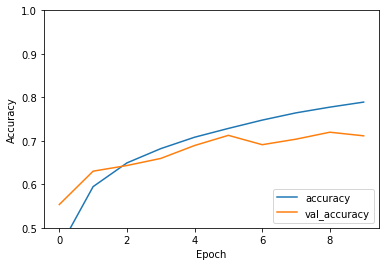

In [18]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [19]:
print(test_acc)

0.7114999890327454
